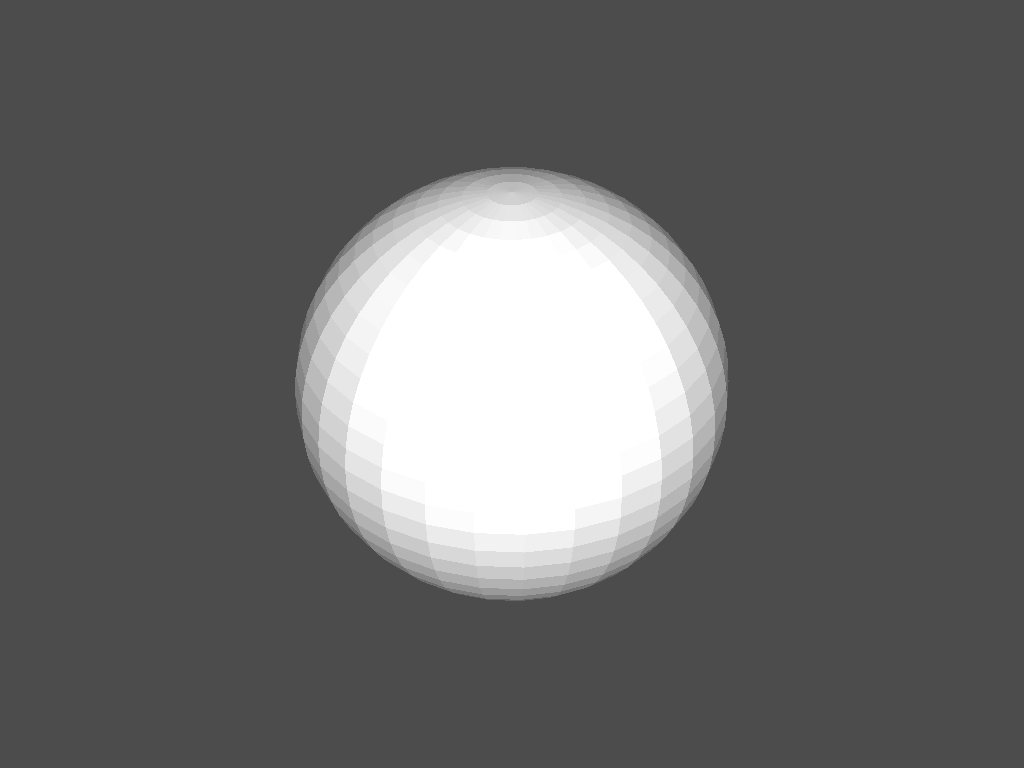

In [1]:
import vtki
import tetgen
import numpy as np

sphere = vtki.Sphere()
tet = tetgen.TetGen(sphere)
tet.tetrahedralize(order=1, mindihedral=20, minratio=1.5)
grid = tet.grid
grid.plot()


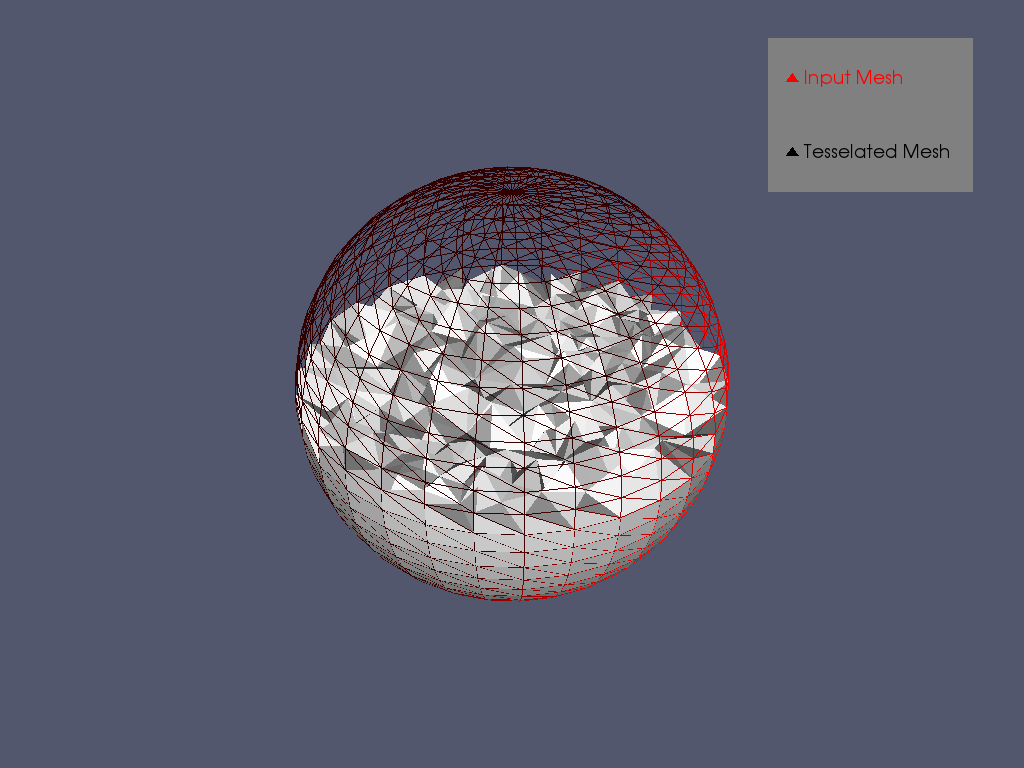

In [2]:
# get cell centroids
cells = grid.cells.reshape(-1, 5)[:, 1:]
cell_center = grid.points[cells].mean(1)

# extract cells below the 0 xy plane
mask = cell_center[:, 2] < 0
cell_ind = mask.nonzero()[0]
subgrid = grid.extract_cells(cell_ind)

# advanced plotting
plotter = vtki.Plotter()
plotter.set_background('w')
plotter.add_mesh(subgrid, 'lightgrey', lighting=True)
plotter.add_mesh(sphere, 'r', 'wireframe')
plotter.add_legend([[' Input Mesh ', 'r'],
                    [' Tesselated Mesh ', 'black']])
plotter.plot()

/Users/jslater/anaconda3/envs/latest/lib/python3.7/site-packages/pyansys/__init__.py:19: UserWarning: Unable to load interactive ANSYS APDL module:

ansys_corba is missing binary files

Please install using PyPi with:
	pip install ansys_corba

Check to make sure your OS is supported:
Linux 64-bit:
	Python2.7
	Python3.4
	Python3.5
	Python3.6
Windows 64-bit:
	Python2.7
	Python3.5
	Python3.6

If your OS os supported and you still encounter this error
open an issue on GitHub at:
https://github.com/akaszynski/ansys_corba/issues
  warnings.warn('Unable to load interactive ANSYS APDL module:\n\n%s' % str(e))


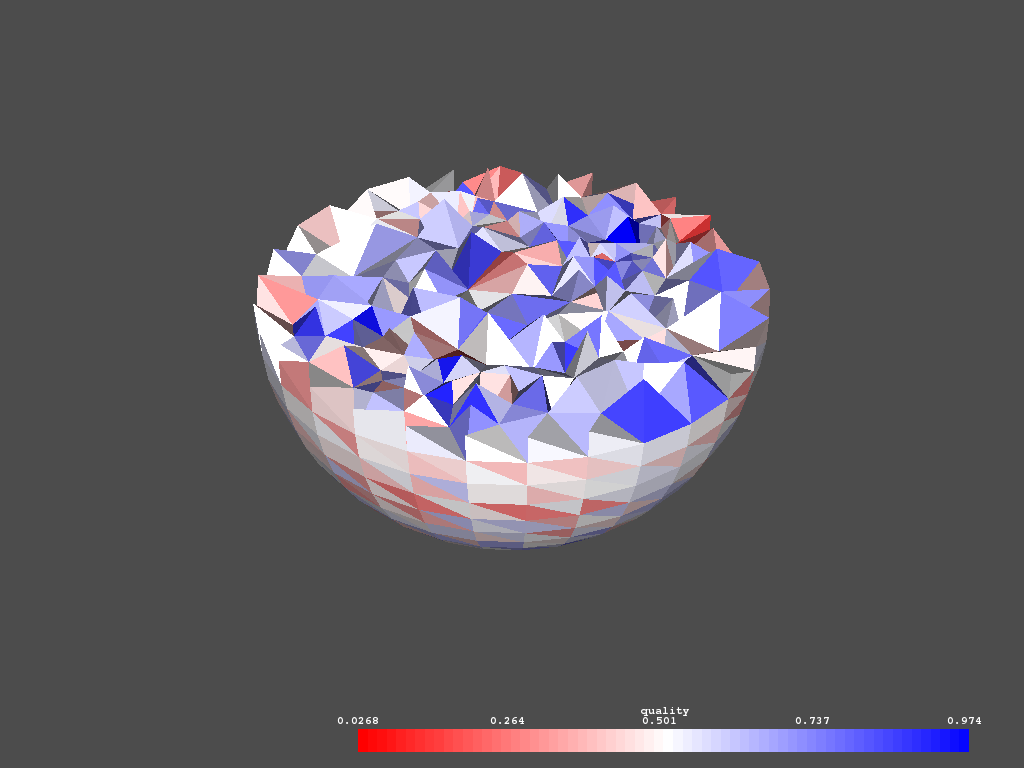

In [3]:
cell_qual = subgrid.quality

# plot quality
subgrid.plot(scalars=cell_qual, stitle='quality', cmap='bwr', flip_scalars=True)